In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
col_names = ['Pt_ID','Diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractaldimension_mean','radius_SE','texture_SE','perimeter_SE','area_SE','smoothness_SE','compactness_SE','concavity_SE','concave points_SE','symmetry_SE','fractaldimension_SE','radius_max','texture_max','perimeter_max','area_max','smoothness_max','compactness_max','concavity_max','concave points_max','symmetry_max','fractaldimension_max']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ML/Assignment/breast-cancer-wisconsin.csv', header=1, names=col_names)


In [ ]:
#drop first column as patient ID number
df.drop(['Pt_ID'], axis=1, inplace=True)


In [ ]:
df.head(5)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave points_max,symmetry_max,fractaldimension_max
0,M,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
1,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,M,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [ ]:
df.count()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractaldimension_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave points_max,symmetry_max,fractaldimension_max
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,14.109116,19.308042,91.842469,653.095062,0.096342,0.104081,0.088430,0.048709,0.181055,0.062780,...,16.237741,25.695944,107.033915,876.678660,0.132331,0.253659,0.271467,0.114214,0.289802,0.083875
std,3.516074,4.291807,24.246060,351.099060,0.014050,0.052391,0.079364,0.038641,0.027344,0.007036,...,4.812562,6.146335,33.433640,566.537304,0.022835,0.156636,0.208168,0.065473,0.061559,0.018032
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.695000,16.175000,75.100000,420.050000,0.086390,0.064710,0.029520,0.020310,0.161900,0.057750,...,13.010000,21.090000,84.095000,514.650000,0.116600,0.146600,0.114450,0.064530,0.250300,0.071365
50%,13.340000,18.870000,86.180000,546.400000,0.095870,0.092630,0.061260,0.033410,0.179200,0.061540,...,14.960000,25.440000,97.650000,684.600000,0.131300,0.211900,0.226400,0.099750,0.282200,0.079990
75%,15.765000,21.805000,103.750000,781.800000,0.105300,0.130400,0.130000,0.073820,0.195650,0.066120,...,18.655000,29.795000,125.050000,1060.000000,0.146000,0.338100,0.381900,0.161300,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
feature_columns = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractaldimension_mean','radius_SE','texture_SE','perimeter_SE','area_SE','smoothness_SE','compactness_SE','concavity_SE','concave points_SE','symmetry_SE','fractaldimension_SE','radius_max','texture_max','perimeter_max','area_max','smoothness_max','compactness_max','concavity_max','concave points_max','symmetry_max','fractaldimension_max']
x = df[feature_columns]
y = df.Diagnosis

In [ ]:
#graph to show mix of benign and malignant
y.value_counts()

B    357
M    210
Name: Diagnosis, dtype: int64

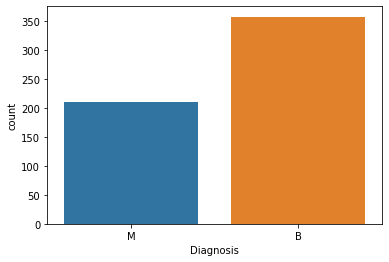

In [ ]:
sns.countplot(x=y)
plt.show()

In [ ]:
# change the Diagnosis column 'M' and 'B' into 1 and 0 respectively
y.replace('B', 0,inplace=True)
y.replace('M', 1,inplace=True)

In [ ]:
#feature importance - dimensionality reduction https://www.mdpi.com/1999-5903/12/3/54, curse of dimensionality https://arxiv.org/pdf/2106.06437.pdf
#high correlation - https://www.mdpi.com/2313-433X/7/11/225, issues with multicollinearity https://www.sciencedirect.com/science/article/pii/S2352914822002246
#features low relevance - use univariant analysis to find those of relevance - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543767/

#.corr pandas function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr uses Pearson R collelation coefficient https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression with range -1 to 1, 1 high colleration



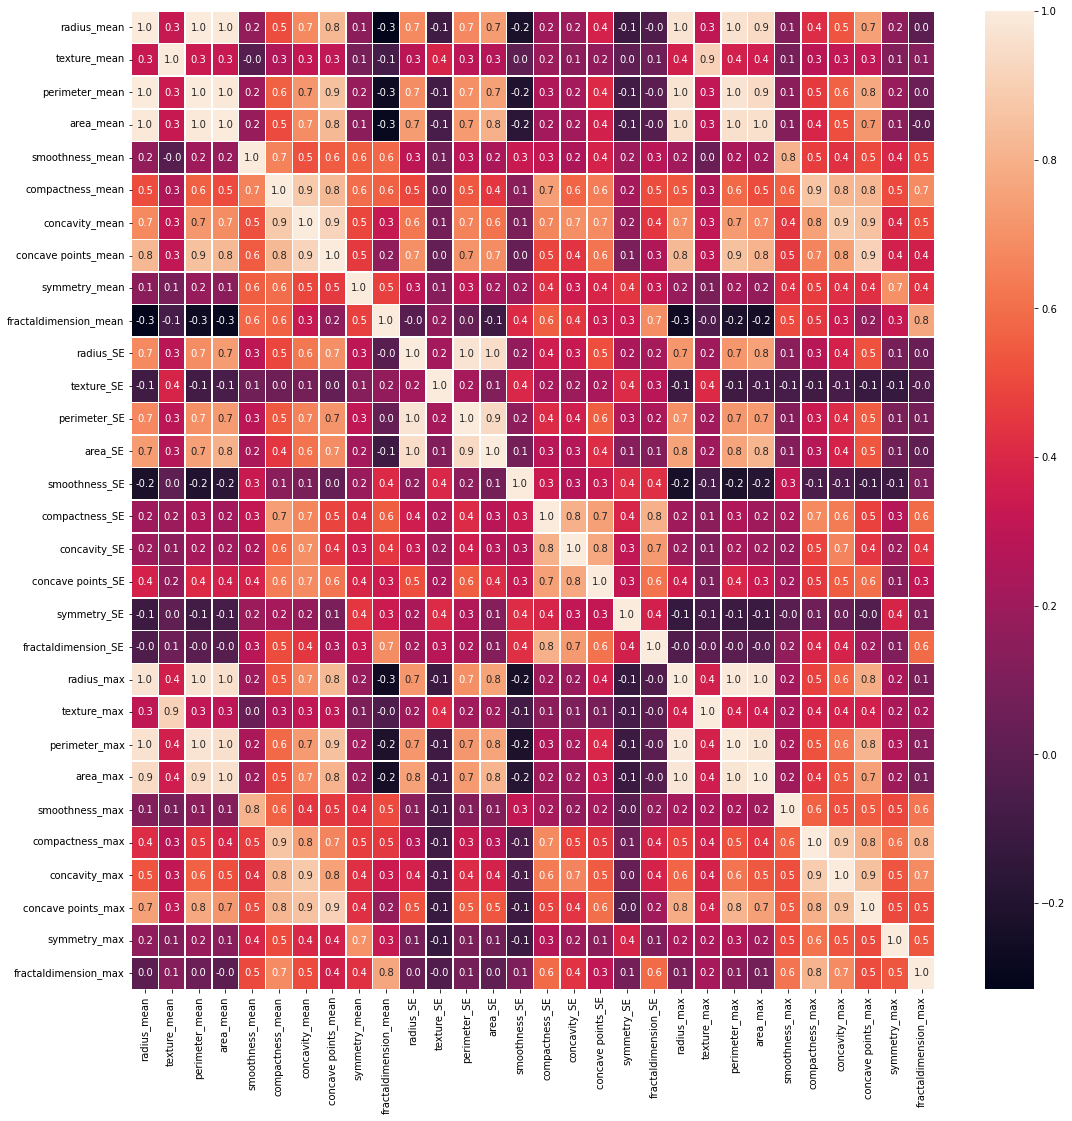

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
x.drop(['radius_mean','area_mean','perimeter_SE','area_SE','radius_max','area_max','perimeter_max'], axis=1, inplace=True)
#where two or more independent variables have a Pearson R co-efficient of 1.0, these are removed

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


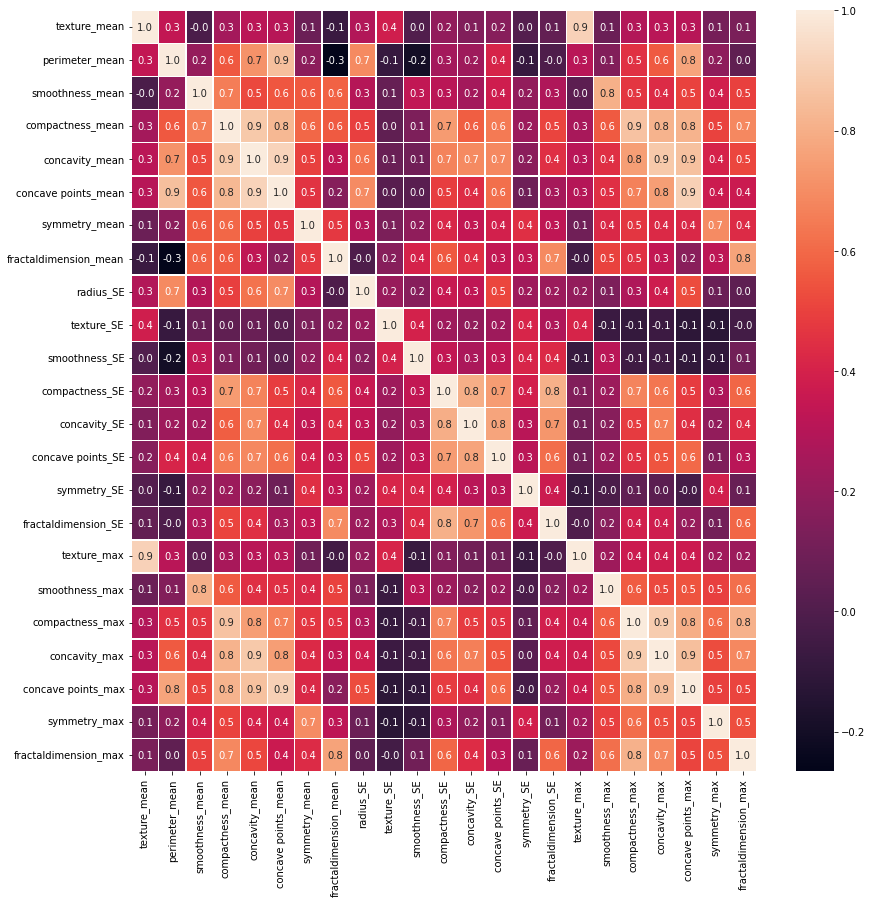

In [ ]:
#correlation map - step 4
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
# all standard, raw data, test_size = 0.35
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.35, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# common used medical metrics for diagnostic tools are: sensitivity, specificity, positive predictive value, negative predictive value.
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2636062/ - mentions all four and validity of medical tests!
#metrics recall equation is the same as sensitivity
#Metrics precision equation is the same as PPV
#https://www.frontiersin.org/articles/10.3389/fpubh.2017.00307/full - explains importance of PPV / NPV in healthcare setting

print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')


Sensitivity:  0.922077922077922
Specificity:  0.9754098360655737
Positive Predictive Value:  95.94594594594594 %
Negative Predictive Value:  95.19999999999999 %;


Text(0.5, 257.44, 'Predicted label')

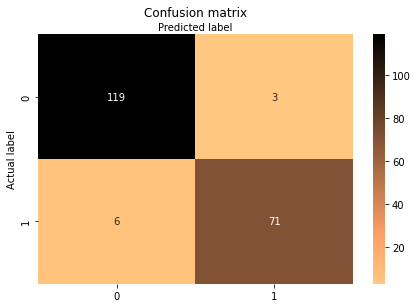

In [ ]:
class_names=[1,0]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='copper_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# all standard, raw data, test_size = 0.3
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.927536231884058
Specificity:  0.9705882352941176
Positive Predictive Value:  95.52238805970148 %
Negative Predictive Value:  95.1923076923077 %;


In [ ]:
# all standard, raw data, test_size = 0.25
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')


Sensitivity:  0.9137931034482759
Specificity:  0.9523809523809523
Positive Predictive Value:  92.98245614035088 %
Negative Predictive Value:  94.11764705882352 %;


In [ ]:
# all standard, raw data, test_size = 0.2
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9111111111111111
Specificity:  0.9420289855072463
Positive Predictive Value:  91.11111111111111 %
Negative Predictive Value:  94.20289855072464 %;


In [ ]:
#On comparing the results from the test / train split, the ratio of 30% test data, 70% training data gives the most accurate specificity, PPV and NPV. This ratio will be used for the following models and fine tuning.
# differs slightly from paper suggesting 33% for same data, though paper does not expand on choice of ratio https://link.springer.com/article/10.1186/s12874-019-0681-4


In [ ]:
#raw data maintained - test/train variable
columns = ["Sensitivity", "Specificity", "PPV",'NPV']
rows = ["0.35", "0.3", "0.25",'0.2',' ','0.3 - Post_Dimensionality_Reduction']
data = np.array([[0.8831, 0.9590, 93.1507,92.8571], [0.9130, 0.9706, 95.4545,94.2857],[0.955, 0.9524, 92.857, 93.0256],[0.888,0.9429,90.909,92.8571],['-','-','-','-'],[0.9275,0.9706,95.5223,95.1923]])
df_testratio = pd.DataFrame(data=data, index=rows, columns=columns)
df_testratio

,Sensitivity,Specificity,PPV,NPV
0.35,0.8831,0.959,93.1507,92.8571
0.3,0.913,0.9706,95.4545,94.2857
0.25,0.955,0.9524,92.857,93.0256
0.2,0.888,0.9429,90.909,92.8571
,-,-,-,-
0.3 - Post_Dimensionality_Reduction,0.9275,0.9706,95.5223,95.1923


In [ ]:
# all standard, raw data, test_size = 0.3
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Feature ranking:
1. feature 5 (0.180291)
2. feature 20 (0.136313)
3. feature 1 (0.123524)
4. feature 4 (0.108084)
5. feature 19 (0.091398)
6. feature 8 (0.060187)
7. feature 18 (0.042591)
8. feature 3 (0.037022)
9. feature 16 (0.035859)
10. feature 0 (0.028269)
11. feature 11 (0.022475)
12. feature 12 (0.018458)
13. feature 7 (0.016724)
14. feature 17 (0.014831)
15. feature 15 (0.014246)
16. feature 13 (0.012918)
17. feature 21 (0.010537)
18. feature 14 (0.009719)
19. feature 10 (0.007830)
20. feature 9 (0.007817)
21. feature 2 (0.007507)
22. feature 22 (0.007037)
23. feature 6 (0.006362)


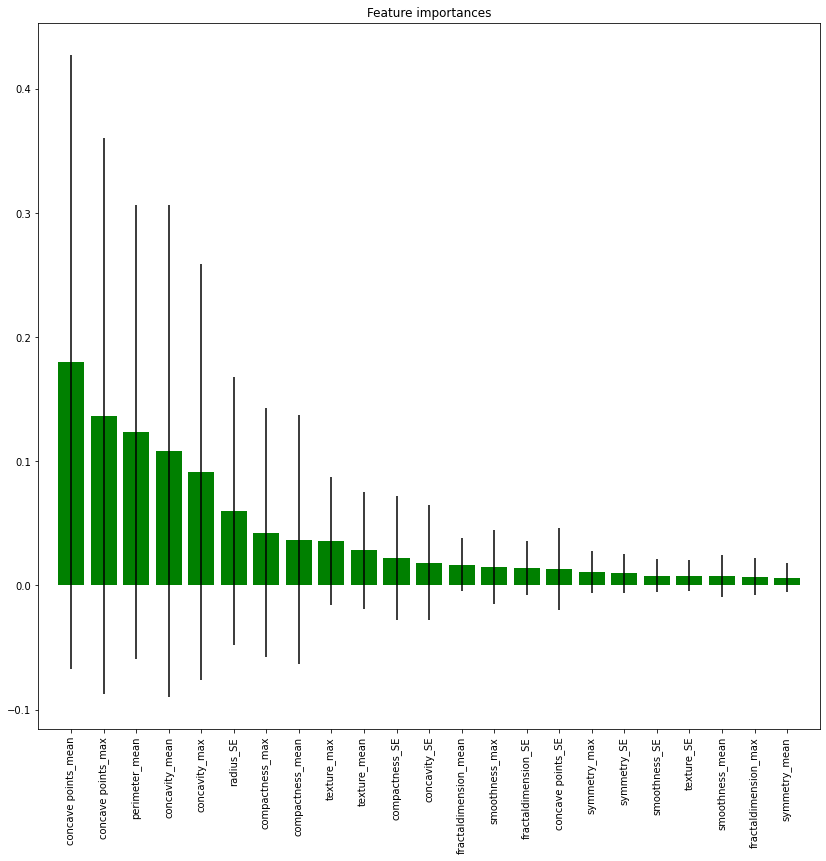

total features: 23
Chosen optimal features by rf: Index(['concave points_max', 'perimeter_mean', 'concavity_mean',
       'concavity_max', 'radius_SE', 'compactness_max', 'compactness_mean',
       'texture_max', 'texture_mean'],
      dtype='object')


In [ ]:
#code adapted from https://medium.com/@shahid_dhn/building-ml-model-to-predict-whether-the-cancer-is-benign-or-malignant-on-breast-cancer-wisconsin-b8249b55fc62 to identify and visualise the independent variables with lowest relevence
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
#Gini importance - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_rf = X_train.columns[indices]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('Chosen optimal features by rf:',selected_feature_rf[1:10])


In [ ]:
'concave points_max','concave points_mean','perimeter_mean','concavity_mean','concavity_max','radius_SE','texture_mean','compactness_mean','texture_max','compactness_max',
'smoothness_max','concave points_SE','concavity_SE','fractaldimension_mean','fractaldimension_SE','symmetry_SE','fractaldimension_max','symmetry_max','compactness_SE','smoothness_mean',
'smoothness_SE','texture_SE','symmetry_mean'

('smoothness_SE', 'texture_SE', 'symmetry_mean')

In [ ]:
optimal_columns = ['concave points_max','concave points_mean','perimeter_mean','concavity_mean','concavity_max','radius_SE','texture_mean','compactness_mean','texture_max',
                   'compactness_max']
x = df[optimal_columns]

In [ ]:
# all standard, raw data, test_size = 0.3
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[98,  4],
       [ 4, 65]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9420289855072463
Specificity:  0.9607843137254902
Positive Predictive Value:  94.20289855072464 %
Negative Predictive Value:  96.07843137254902 %;


In [ ]:
columns_m_f = ["Sensitivity", "Specificity", "PPV",'NPV']
rows_m_f = ['concave points_max','+ concave points_mean','+ perimeter_mean','+ concavity_mean','+ concavity_max','+ radius_SE','+ texture_mean','+ compactness_mean','+texture_max','+ compactness_max',
'+ smoothness_max','+ concave points_SE','+ concavity_SE','+ fractaldimension_mean','+ fractaldimension_SE','+ symmetry_SE','+ fractaldimension_max','+ symmetry_max','+ compactness_SE','+ smoothness_mean',
'+ smoothness_SE','+ texture_SE','+ symmetry_mean']
data_m_f = np.array([[0.3478, 1.0, 100,69.388],
                     [0.478, 1.0, 100, 73.913],
                     [0.8696,0.9216,88.235,91.262],
                     [0.8841,0.9314,89.706,92.233],
                     [0.8986,0.9314,89.551,93.137],
                     [0.8841,0.9412,91.045,92.308],
                     [0.9275,0.9314,90.141,95],
                     [0.9275,0.9314,90.242,95],
                     [0.9420,0.9411,91.543,96],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9420,0.9608,94.202,96.078],
                     [0.9275,0.9706,95.5223,95.1923],
                     [0.9275,0.9706,95.5223,95.1923]])
df_post_m_f = pd.DataFrame(data=data_m_f, index=rows_m_f, columns=columns_m_f)


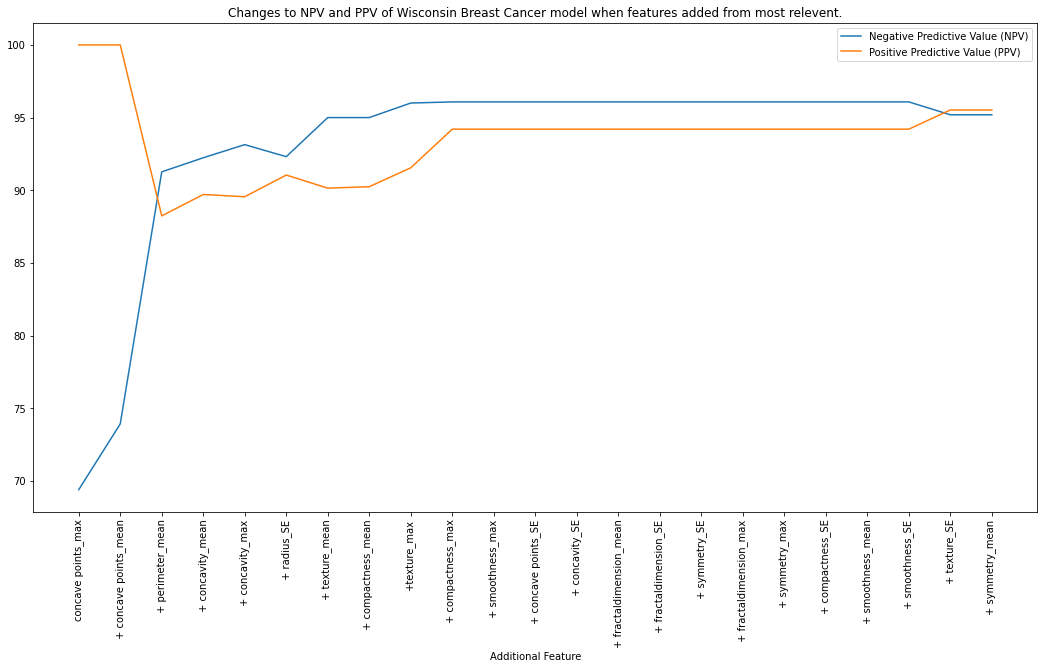

In [ ]:
aa = df_post_m_f.NPV
ab = df_post_m_f.PPV


ax = plt.plot(aa, label='Negative Predictive Value (NPV)')
plt.plot(ab, label='Positive Predictive Value (PPV)')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 9)
plt.legend()
plt.xlabel('Additional Feature')
plt.title('Changes to NPV and PPV of Wisconsin Breast Cancer model when features added from most relevent.')
fig.savefig('Specificity_Sensitivity.jpg')
plt.show()

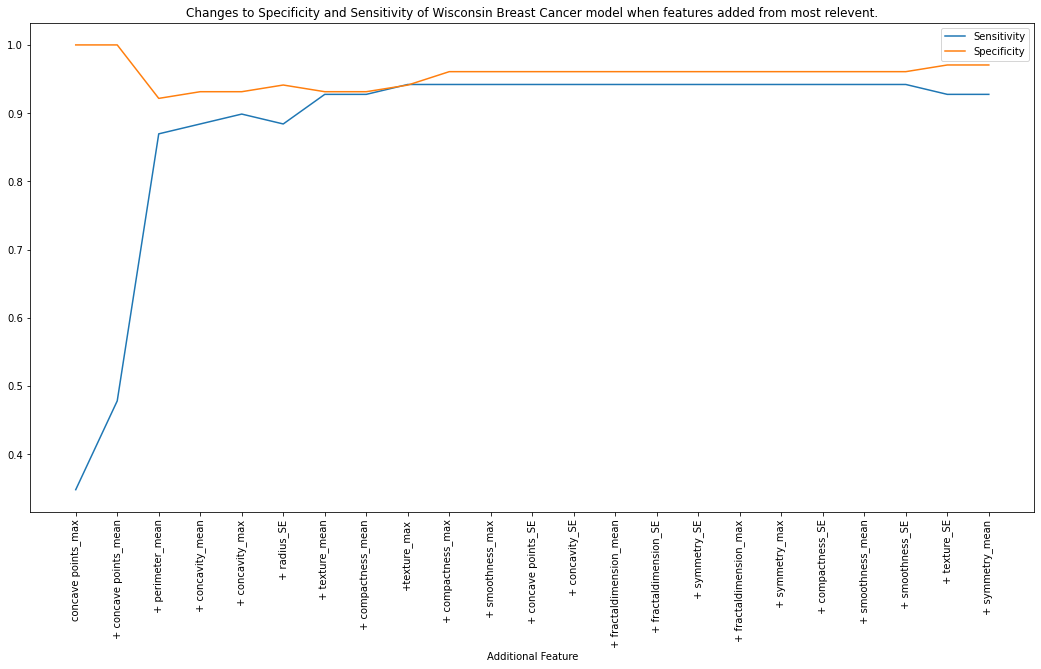

In [ ]:
ac = df_post_m_f.Sensitivity
z = df_post_m_f.Specificity


ax = plt.plot(ac, label='Sensitivity')
plt.plot(z, label='Specificity')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 9)
plt.legend()
plt.xlabel('Additional Feature')
plt.title('Changes to Specificity and Sensitivity of Wisconsin Breast Cancer model when features added from most relevent.')
fig.savefig('Specificity_Sensitivity.jpg')
plt.show()

In [ ]:
#with test/train ratio maintained at 0.3 and random_state=42, comparing the raw data scores noted compared with post multicollinearity and feature importance preprocessing, the following improvements have been found, using logistic regression as constant model
columns_m_f = ["Sensitivity", "Specificity", "PPV",'NPV']
rows_m_f = ['Raw data', 'Post multicollinearity and feature importance preprocessing']
data_m_f = np.array([[0.9130, 0.9706, 95.4545,94.2857],[0.9420, 0.9608, 94.2029, 96.07843]])
df_post_m_f = pd.DataFrame(data=data_m_f, index=rows_m_f, columns=columns_m_f)
df_post_m_f
#small decreases in Specificity and PPV, though significant increase in NPV, which will be explored in the context of healthcare setting and importance of minimising false negatives in Cn dx

,Sensitivity,Specificity,PPV,NPV
Raw data,0.913,0.9706,95.4545,94.28570
Post multicollinearity and feature importance preprocessing,0.942,0.9608,94.2029,96.07843


In [ ]:
#normalisation or Standarisation https://scikit-learn.org/stable/modules/preprocessing.html#discretization
#using test / train ratio of 30%

#model preference
#common used models in medical diagnostics
#https://link.springer.com/article/10.1186/s12874-019-0681-4 - GLM, SVM, single layer ANN
#https://web.s.ebscohost.com/abstract?direct=true&profile=ehost&scope=site&authtype=crawler&jrnl=09765697&AN=131469937&h=OFIboHwT9GEAR8W2uPNW%2buzUpLdNqo7mwiUaYVxhvMfEgM0Epw7AAOJ0%2f3bcy7IkzQNz2IcY16iL0AbyuRaOlA%3d%3d&crl=c&resultNs=AdminWebAuth&resultLocal=ErrCrlNotAuth&crlhashurl=login.aspx%3fdirect%3dtrue%26profile%3dehost%26scope%3dsite%26authtype%3dcrawler%26jrnl%3d09765697%26AN%3d131469937 - SVM, Naiive Bayesian, J48, Random Forest


In [ ]:
#Normalisation - https://www.sciencedirect.com/science/article/pii/S1568494619302947?fr=RR-2&ref=pdf_download&rr=783564493d427333
# discussion - within data some of the variables have larger numerical differences, especially relevent to distance based models.
# https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
x.describe()
# highlight large differences in independent variable ranges. For example numerical range of perimeter_mean is 144.71, compared to concave points_mean range of 0.201 in the processed data

,concave points_max,concave points_mean,perimeter_mean,concavity_mean,concavity_max,radius_SE,texture_mean,compactness_mean,texture_max,compactness_max
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,0.114214,0.048709,91.842469,0.088430,0.271467,0.403711,19.308042,0.104081,25.695944,0.253659
std,0.065473,0.038641,24.246060,0.079364,0.208168,0.276220,4.291807,0.052391,6.146335,0.156636
min,0.000000,0.000000,43.790000,0.000000,0.000000,0.111500,9.710000,0.019380,12.020000,0.027290
25%,0.064530,0.020310,75.100000,0.029520,0.114450,0.232350,16.175000,0.064710,21.090000,0.146600
50%,0.099750,0.033410,86.180000,0.061260,0.226400,0.323700,18.870000,0.092630,25.440000,0.211900
75%,0.161300,0.073820,103.750000,0.130000,0.381900,0.475950,21.805000,0.130400,29.795000,0.338100
max,0.291000,0.201200,188.500000,0.426800,1.252000,2.873000,39.280000,0.345400,49.540000,1.058000


In [ ]:
x.shape

(567, 10)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  4],
       [ 4, 65]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9420289855072463
Specificity:  0.9607843137254902
Positive Predictive Value:  94.20289855072464 %
Negative Predictive Value:  96.07843137254902 %;


In [ ]:
from sklearn import preprocessing
norm_scale = preprocessing.Normalizer().fit(X_train)
X_train_norm = norm_scale.transform(X_train)
X_test_norm = norm_scale.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)
y_pred = logreg.predict(X_test_norm)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[102,   0],
       [ 69,   0]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.0
Specificity:  1.0
Positive Predictive Value:  0.0 %
Negative Predictive Value:  59.64912280701754 %;


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#effect normalisation / standardisation on logistic regression with default settings
columns_m_f = ["Sensitivity", "Specificity", "PPV",'NPV']
rows_m_f = ['Raw data', 'Post multicollinearity and feature importance preprocessing','Post Standardisation','Post Normalisation']
data_m_f = np.array([[0.9130, 0.9706, 95.4545,94.2857],[0.9420, 0.9608, 94.2029, 96.07843],[0.9420, 0.9608, 94.2029, 96.07843],[0,1,0,59.649]])
df_post_m_f = pd.DataFrame(data=data_m_f, index=rows_m_f, columns=columns_m_f)
df_post_m_f

,Sensitivity,Specificity,PPV,NPV
Raw data,0.913,0.9706,95.4545,94.28570
Post multicollinearity and feature importance preprocessing,0.942,0.9608,94.2029,96.07843
Post Standardisation,0.942,0.9608,94.2029,96.07843
Post Normalisation,0.000,1.0000,0.0000,59.64900


In [ ]:
#optimising Logistic Regression model
#default penalty = l2, default solver=lbfgs, max_iter=100, C=1, class_weight=none
#class_weight=balanced - refers to the class distrbution https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
logreg = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced')
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[97,  5],
       [ 3, 66]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9565217391304348
Specificity:  0.9509803921568627
Positive Predictive Value:  92.95774647887323 %
Negative Predictive Value:  97.0 %;


In [ ]:
columns_m_f = ["Sensitivity", "Specificity", "PPV",'NPV']
rows_m_f = ['Raw data', 'Post multicollinearity and feature importance preprocessing','Using Standardisation Data','Using Normalisation Data','Post Optimisation']
data_m_f = np.array([[0.9130, 0.9706, 95.4545,94.2857],[0.9420, 0.9608, 94.2029, 96.07843],[0.9420, 0.9608, 94.2029, 96.07843],[0,1,0,59.649],[0.9565,0.9510,92.958,97.0]])
df_post_m_f = pd.DataFrame(data=data_m_f, index=rows_m_f, columns=columns_m_f)
df_post_m_f

,Sensitivity,Specificity,PPV,NPV
Raw data,0.9130,0.9706,95.4545,94.28570
Post multicollinearity and feature importance preprocessing,0.9420,0.9608,94.2029,96.07843
Using Standardisation Data,0.9420,0.9608,94.2029,96.07843
Using Normalisation Data,0.0000,1.0000,0.0000,59.64900
Post Optimisation,0.9565,0.9510,92.9580,97.00000


In [ ]:
#SVN -https://scikit-learn.org/stable/modules/svm.html#svm-kernels
#code adapted - 
#c and gamma - https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', class_weight='balanced', C=1, gamma=0.1 ) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_std)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[97,  5],
       [ 2, 67]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9710144927536232
Specificity:  0.9509803921568627
Positive Predictive Value:  93.05555555555556 %
Negative Predictive Value:  97.97979797979798 %;


In [ ]:
#Random Forest Classification
#code adapted from https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train_std,y_train)
y_pred=clf.predict(X_test_std)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,   2],
       [  4,  65]])

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.9420289855072463
Specificity:  0.9803921568627451
Positive Predictive Value:  97.01492537313433 %
Negative Predictive Value:  96.15384615384616 %;


In [ ]:
from pandas.core.common import random_state
# Define Parameters
from sklearn.model_selection import GridSearchCV

n_estimators = [1000]
max_features = [9]


param_grid = dict(n_estimators=n_estimators,max_features =max_features)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators,max_features =max_features, class_weight='balanced')
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train_std, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.94186709], using {'max_features': 9, 'n_estimators': 1000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.505428,0.025895,0.08524,0.005213,9,1000,"{'max_features': 9, 'n_estimators': 1000}",0.9625,0.924051,0.911392,0.949367,0.962025,0.941867,0.020661,1


([<matplotlib.axis.YTick at 0x7f6ce750c610>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

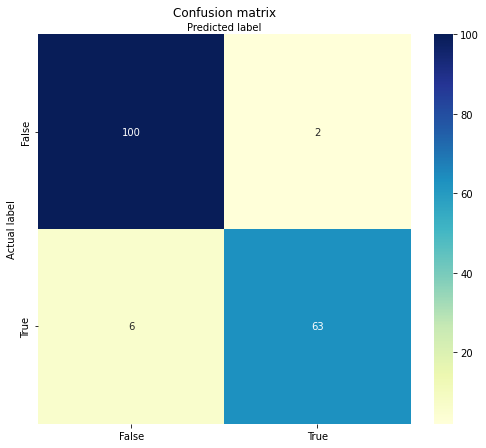

In [ ]:
#code adapted https://www.relataly.com/hyperparameter-tuning-with-grid-search/2261/
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test_std)

# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [ ]:
print('Sensitivity: ', metrics.recall_score(y_test,y_pred))
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity: ',specificity)
print('Positive Predictive Value: ', (metrics.precision_score(y_test,y_pred))*100,'%')
npv = (cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))*100
print('Negative Predictive Value: ',npv,'%;')

Sensitivity:  0.927536231884058
Specificity:  0.9901960784313726
Positive Predictive Value:  98.46153846153847 %
Negative Predictive Value:  95.28301886792453 %;


In [ ]:
#Advantages / Disadvantages - each system - efficacy
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00327-4
# poor agreement on RF most influencial hyperparameters https://www.jmlr.org/papers/volume13/biau12a/biau12a.pdf example different examples
#https://nutrition.bmj.com/content/early/2021/03/09/bmjnph-2020-000200



In [ ]:
#ethics https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.24886
# ways to improve: test on second set of data from different source removing recording bias, combining algorithms, 